# Limpieza y Preparación de Datos caso covid-19 fase 1
### Carlos Rodrigo Piñeros, Juan Restrepo Rosero y Joel Doria Atencia
### curso gestión de datos, Maestria en ciencia de datos Universidad Javeriana de Cali

### Limpieza y preparación de datos
Es el proceso fundamental de transformar datos disponibles en información limpia, consistente y utilizable para el análisis, la toma de decisiones y el aprendizaje automático. Este proceso implica identificar y corregir errores, inconsistencias y valores faltantes en los datos, así como estandarizar formatos y estructuras. Este proceso es importante porque permite:

- Mayor precisión en los resultados: Datos limpios conducen a análisis más precisos y confiables.
- Aumento de la eficiencia: Datos preparados aceleran los procesos de análisis y modelado.
- Prevención de errores: Identificar y corregir errores desde el principio evita problemas a largo plazo.

Durante la limpieza de datos se resaltan las siguientes actividades:

- Detección de valores atípicos: Identificar valores que se desvían significativamente de la norma.
- Corrección de errores: Corregir errores de tipeo, formato y cálculo.
- Tratamiento de valores faltantes: Imputar valores faltantes utilizando métodos estadísticos o de aprendizaje automático.
- Eliminación de duplicados: Eliminar registros duplicados para evitar sesgos en el análisis.
- Normalización: Convertir datos a un formato común y comparable.

En la preparación de datos se resaltan:

- Transformación: Convertir datos a un formato adecuado para el análisis (ej: discretización, binarización).
- Creación de nuevas variables: Derivar nuevas variables a partir de las existentes (ej: ratios, indicadores).
- Selección de variables: Seleccionar las variables más relevantes para el análisis.
- Reducción de dimensionalidad: Reducir el número de variables para mejorar la eficiencia computacional.

La limpieza y preparación de datos es una etapa crucial en cualquier proyecto de análisis de datos. Al invertir tiempo y esfuerzo en esta fase, se garantiza la calidad de los resultados y se tomaran decisiones más acertadas.

### casos confirmados covid-19
Este dataset es un repositorio ampliamente utilizado en la comunidad científica para analizar la evolución de la pandemia de COVID-19 a nivel mundial. Este archivo CSV contiene información sobre el número acumulado de casos confirmados de COVID-19 por país y por fecha, desde el inicio de la pandemia.

Para analizar este dataset, vamos a utilizar el lenguaje de programación Python, con las librerías Pandas, Numpy y Matplotlib para responder las siguientes preguntas:

1. ¿En cuál mes se presentó el mayor número de contagios?
2. ¿En ese mismo mes, cuál fue el país que reportó más contagios?
3. ¿Cuál es el país con el menor número de casos reportados hasta la
fecha?





In [ ]:
# Importar librerías Pandas, Numpy y Matplotlib para analizar y limpiar los datos
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# Utilizar la función read_csv() de Pandas para cargar el archivo CSV
data_origen = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

Dado que estamos trabajando con un dataset de casos confirmados de COVID-19, hay algunos aspectos específicos que debemos considerar:

1. Comprender la Estructura de los Datos:

El dataset presenta la siguiente estructura:

- **Province/State**: Región o provincia. Tipo categórico.
- **Country/Region**: País.Tipo categórico.
- **Lat**: Latitud geográfica. Tipo numérico.
- **Long**: Longitud geográfica. Tipo numérico.
- **Columnas desde 1/22/20**: representan las fechas, a partir de las cuales se registra el número acumulado de casos, comenzando desde el 22 de enero de 2020. Tipo numérico.

El valor numérico en cada celda indica el número total de casos confirmados hasta esa fecha en el país o región correspondiente.


In [ ]:
# Para visualizar los primeros registros usamos el método head().
data_origen.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,9106,9106,9106,9106,9106,9106,9106,9106,9106,9106
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,10044125,10044125,10044125,10044125,10044125,10044125,10044957,10044957,10044957,10044957
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,446819,446819,446819,446819,446819,446819,446819,446819,447308,447308
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,232018,232018,232619,232619,232619,232619,232619,232619,232619,232974


In [ ]:
# Para visualizar los ultimos registros usamos el método tail().
data_origen.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
279,NaN,Uruguay,-32.522800,-55.765800,0,0,0,0,0,0,...,1034303,1034303,1034303,1034303,1034303,1034303,1034303,1034303,1034303,1034303
280,NaN,Uzbekistan,41.377491,64.585262,0,0,0,0,0,0,...,250932,251071,251071,251071,251071,251071,251071,251071,251247,251247
281,NaN,Vanuatu,-15.376700,166.959200,0,0,0,0,0,0,...,12014,12014,12014,12014,12014,12014,12014,12014,12014,12014
282,NaN,Venezuela,6.423800,-66.589700,0,0,0,0,0,0,...,551981,551986,551986,552014,552051,552051,552125,552157,552157,552162
283,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,11526917,11526926,11526937,11526950,11526962,11526966,11526966,11526986,11526994,11526994
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135
288,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,263921,264127,264127,264127,264127,264127,264127,264127,264276,264276


In [ ]:
# Usamos el método info() para obtener información de las columnas del dataset.
data_origen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


El metodo info() proporciona un resumen conciso del Dataset, incluyendo el número de filas y columnas, los tipos de datos de cada columna y el uso de memoria:

- Dimensiones: El DataFrame tiene 289 filas (registros) y 1147 columnas (que corresponden a las fechas).
- Tipos de Datos:
    - **Float64 (2):** Dos columnas contienen números de punto flotante, que corresponden a la latitud y longitud geográficas.
    - **Int64 (1143):** La mayoría de las columnas son de tipo entero, que corresponden a los conteos acumulados en cada fecha.
    - **Object (2):** Estas columnas probablemente contienen texto, que corresponden a las columnas Province/State y Country/Region.
    
- Uso de Memoria: El DataFrame ocupa aproximadamente 2.5 MB en la memoria, lo cual es relativamente bajo considerando el gran número de columnas.





In [ ]:
# Si usamos el método describe() con el parámetros include='0' podemos ver información adicional de las columnas
# que tienen valores categóricos.
data_origen.describe(include='O')

,Province/State,Country/Region
count,91,289
unique,91,201
top,Australian Capital Territory,China
freq,1,34


La salida anterior nos proporciona información sobre la distribución de los valores dentro de estas dos columnas categóricas.

- **count:** Indica el número total de valores no nulos en cada columna. En este caso, tenemos 91 valores únicos para 'Province/State' y 289 valores para 'Country/Region'. Esto sugiere que hay más de un valor de 'Province/State' por cada valor de 'Country/Region', lo cual es lógico, ya que un país puede tener múltiples provincias o estados.
- **unique:** Muestra el número de valores únicos en cada columna. Esto significa que hay 91 provincias/estados diferentes y 201 países/regiones diferentes en el dataset.
- **top:** Indica el valor más frecuente en cada columna. En este caso, 'Australian Capital Territory' es la provincia/estado que aparece con mayor frecuencia, mientras que 'China' es el país/región que aparece con mayor frecuencia.
- **freq:** Muestra la frecuencia del valor más frecuente. En este caso, 'Australian Capital Territory' aparece una vez, mientras que 'China' aparece 34 veces.

In [ ]:
# Usamos el método descibre para obtener datos estadísticos de las columnas de tipo numérico.
data_origen.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,287.0,1.971872e+01,2.595661e+01,-71.9499,4.072192,21.512583,4.040178e+01,7.170690e+01
Long,287.0,2.218208e+01,7.787093e+01,-178.1165,-32.823050,20.939400,8.922435e+01,1.780650e+02
1/22/20,289.0,1.927336e+00,2.617366e+01,0.0000,0.000000,0.000000,0.000000e+00,4.440000e+02
1/23/20,289.0,2.273356e+00,2.627019e+01,0.0000,0.000000,0.000000,0.000000e+00,4.440000e+02
1/24/20,289.0,3.266436e+00,3.270727e+01,0.0000,0.000000,0.000000,0.000000e+00,5.490000e+02
...,...,...,...,...,...,...,...,...
3/5/23,289.0,2.339187e+06,8.518645e+06,0.0000,14567.000000,103248.000000,1.052664e+06,1.036470e+08
3/6/23,289.0,2.339387e+06,8.519346e+06,0.0000,14567.000000,103248.000000,1.052664e+06,1.036555e+08
3/7/23,289.0,2.339839e+06,8.521641e+06,0.0000,14567.000000,103248.000000,1.052926e+06,1.036909e+08
3/8/23,289.0,2.340460e+06,8.524968e+06,0.0000,14567.000000,103248.000000,1.053068e+06,1.037558e+08


Analizar esta salida de describe() nos permite tener una idea inicial de la distribución de los valores en cada columna numérica y detectar posibles valores atípicos. Aquí un análisis más detallado:

#### **1. Columnas de Latitud (Lat) y Longitud (Long)**
**Promedio y Desviación Estándar:**
- Lat: Promedio de 19.72, desviación estándar de 25.96.
- Long: Promedio de 22.18, desviación estándar de 77.87.

**Rango de Valores:**
- Latitudes: Desde -71.95 hasta 71.71.
- Longitudes: Desde -178.12 hasta 178.06.

Estos valores son consistentes con coordenadas geográficas, pero su gran rango y desviación estándar podrían indicar valores atípicos en ubicaciones extremas (como países cerca de los polos o posiciones de longitud muy negativas o positivas).

#### **2. Columnas de Fechas**
Cada una de estas columnas representa la cantidad de casos confirmados para una fecha específica y muestra las siguientes estadísticas:

**Promedios Altos y Rango de Valores Extremos:**
- Los valores promedio incrementan conforme se avanza en las fechas, alcanzando millones en las últimas fechas (3/5/23 a 3/9/23), lo que es consistente con el aumento acumulativo de casos de COVID-19 en el tiempo.
- La desviación estándar también es considerable, lo que sugiere una amplia variabilidad entre países.

**Percentiles e Incremento en la Mediana:**
- El incremento en el 50% (mediana) y el 75% en los últimos días indica que la mayoría de los países muestran un acumulado de casos, con un incremento continuo y gradual en los casos confirmados.

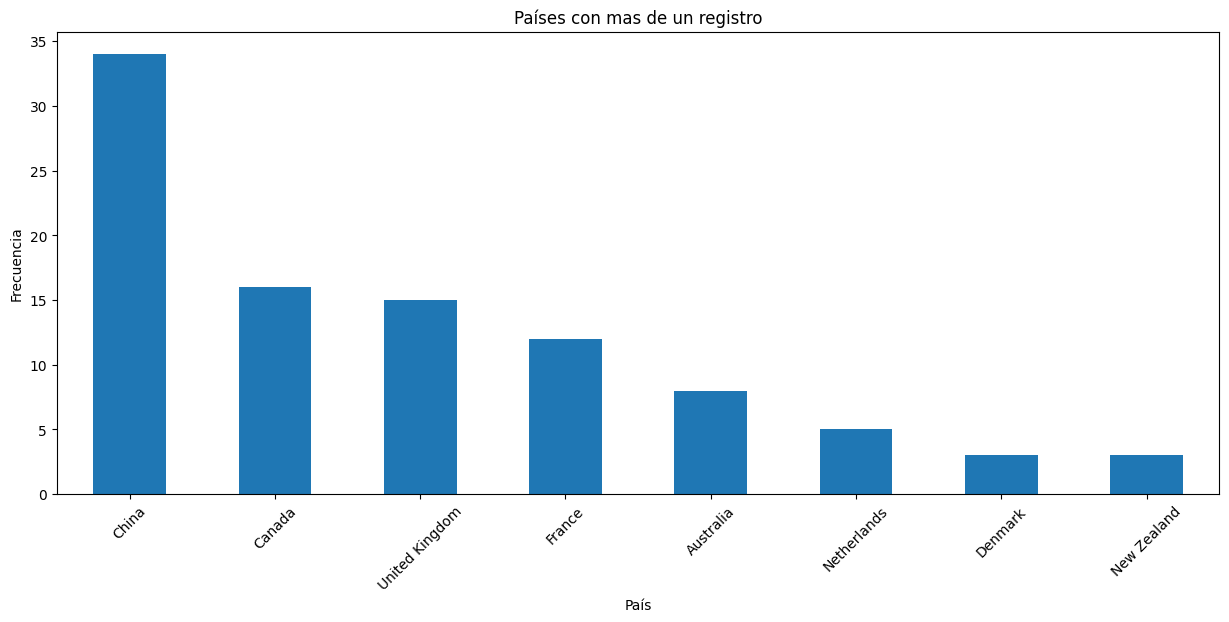

In [ ]:
# Contar la frecuencia de cada país
country_counts = data_origen['Country/Region'].value_counts()
# Filtrar los países con frecuencia mayor a 1
country_counts = country_counts[country_counts > 1]
# Crear un gráfico de barras
plt.figure(figsize=(15, 6))
country_counts.plot(kind='bar')
plt.title('Países con mas de un registro')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

En el grafico anterior, se muestran los paises que tienen varios registros en el dataset, que se deben evaluar si es necesario unificarlos.

A continuación, se evaluan los valores únicos de la columna paises, donde se observan algunos registros que no son paises en realidad como 'Winter Olympics 2022'

In [ ]:
# Usamos el método unique() sobre la columna deseada para verificar cúales son los valores únicos.
data_origen['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [ ]:
# Identificar las columnas que queremos mantener como identificadores
id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long']

# Derretir el DataFrame para obtener una fila por cada combinación de provincia, país, fecha y caso confirmado
df_melted = pd.melt(data_origen,
                    id_vars=id_vars,
                    var_name='Fecha',
                    value_name='Casos confirmados')


# Convertir la columna 'Fecha' a tipo datetime
df_melted['Fecha'] = pd.to_datetime(df_melted['Fecha'], format='%m/%d/%y')

# Mostrar el DataFrame transformado
df_melted.head(2000)





,Province/State,Country/Region,Lat,Long,Fecha,Casos confirmados
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0
...,...,...,...,...,...,...
1995,NaN,Uganda,1.373333,32.290275,2020-01-28,0
1996,NaN,Ukraine,48.379400,31.165600,2020-01-28,0
1997,NaN,United Arab Emirates,23.424076,53.847818,2020-01-28,0
1998,Anguilla,United Kingdom,18.220600,-63.068600,2020-01-28,0


In [ ]:
# Agrupar por 'Country/Region' y 'Fecha' para consolidar los casos diarios de todas las provincias de un país
df_consolidado = df_melted.groupby(['Country/Region', 'Fecha']).agg({'Casos confirmados': 'sum'}).reset_index()

# Calcular los casos diarios (diferencia entre días consecutivos)
df_consolidado = df_consolidado.sort_values(by=['Country/Region', 'Fecha'])
df_consolidado['CasosDiarios'] = df_consolidado.groupby('Country/Region')['Casos confirmados'].diff().fillna(df_consolidado['Casos confirmados'])

# Crear columnas para el año y el mes para el análisis mensual y anual
df_consolidado['Año'] = df_consolidado['Fecha'].dt.year
df_consolidado['Mes'] = df_consolidado['Fecha'].dt.month

In [ ]:
# 1. Calcular los contagios por mes y encontrar el mes con mayor número de contagios

# Agrupar por año y mes para obtener los casos totales por mes
casos_por_mes_y_ano = df_consolidado.groupby(['Año', 'Mes'])['CasosDiarios'].sum()

# Encontrar el año y mes con el mayor número de casos
max_casos = casos_por_mes_y_ano.max()
indice_max = casos_por_mes_y_ano.idxmax()
ano_max, mes_max = indice_max

print(f"El año con más casos diarios fue: {ano_max}")
print(f"El mes con más casos diarios fue: {mes_max}")
print(f"Número total de casos en ese mes y año: {max_casos}")

El año con más casos diarios fue: 2022
El mes con más casos diarios fue: 1
Número total de casos en ese mes y año: 90483564.0


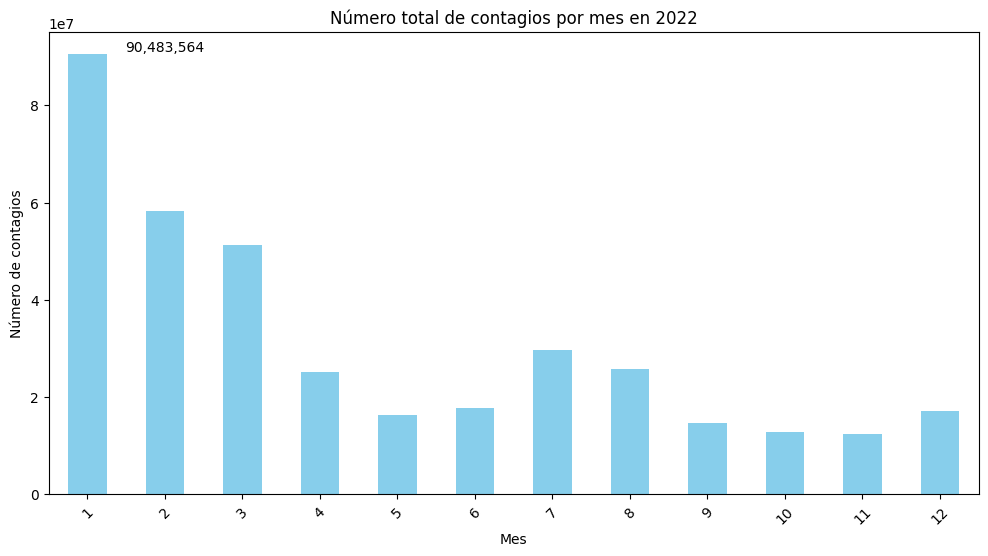

In [ ]:
# Gráfico de barras de casos por mes en el año pico
plt.figure(figsize=(12, 6))
ax = casos_por_mes_y_ano.loc[ano_max].plot(kind='bar', color='skyblue')
plt.title(f'Número total de contagios por mes en {ano_max}')
plt.xlabel('Mes')
plt.ylabel('Número de contagios')
plt.xticks(rotation=45)

# Identificar el mes con el mayor número de contagios
mes_max_indice = casos_por_mes_y_ano.loc[ano_max].idxmax()  # Mes con más contagios en el año máximo
valor_max = casos_por_mes_y_ano.loc[ano_max][mes_max_indice]

# Mostrar el valor en la barra correspondiente
ax.text(mes_max_indice, valor_max + 5000, f'{valor_max:,.0f}', ha='center', va='bottom', fontsize=10)

plt.show()

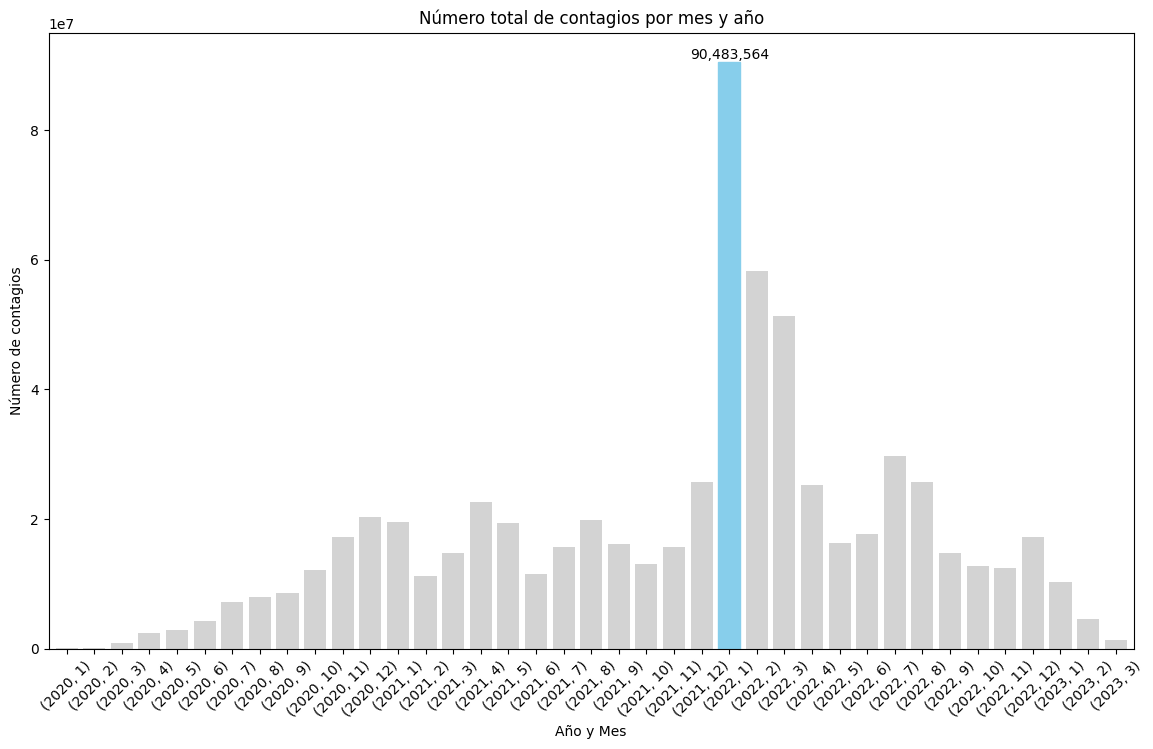

In [ ]:
# Gráfico de todos los meses y años
plt.figure(figsize=(14, 8))
ax = casos_por_mes_y_ano.plot(kind='bar', color='lightgray', width=0.8)  # Color neutro para todas las barras
plt.title('Número total de contagios por mes y año')
plt.xlabel('Año y Mes')
plt.ylabel('Número de contagios')
plt.xticks(rotation=45)

# Resaltar la barra del mes con el mayor número de contagios
indice_max_barra = casos_por_mes_y_ano.index.get_loc(indice_max)  # Índice de la barra del mes máximo
ax.patches[indice_max_barra].set_color('skyblue')  # Cambiar el color de la barra específica

# Mostrar el valor en la barra del mes máximo
ax.text(indice_max_barra, max_casos + 5000, f'{max_casos:,.0f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [ ]:
# 2. Encontrar el país con más contagios en el mes con mayor número de contagios
df_mes_max = df_consolidado[(df_consolidado['Año'] == ano_max) & (df_consolidado['Mes'] == mes_max)]

# Agrupar por país y sumar los casos diarios para obtener el total de contagios en el mes pico
contagios_por_pais_mes_max = df_mes_max.groupby('Country/Region')['CasosDiarios'].sum()

# Identificar el país con el mayor número de contagios en ese mes
pais_max_contagios = contagios_por_pais_mes_max.idxmax()
print(f"En {ano_max}-{mes_max}, el país con más contagios fue {pais_max_contagios}, con {contagios_por_pais_mes_max[pais_max_contagios]:,} casos.")


En 2022-1, el país con más contagios fue US, con 20,336,435.0 casos.


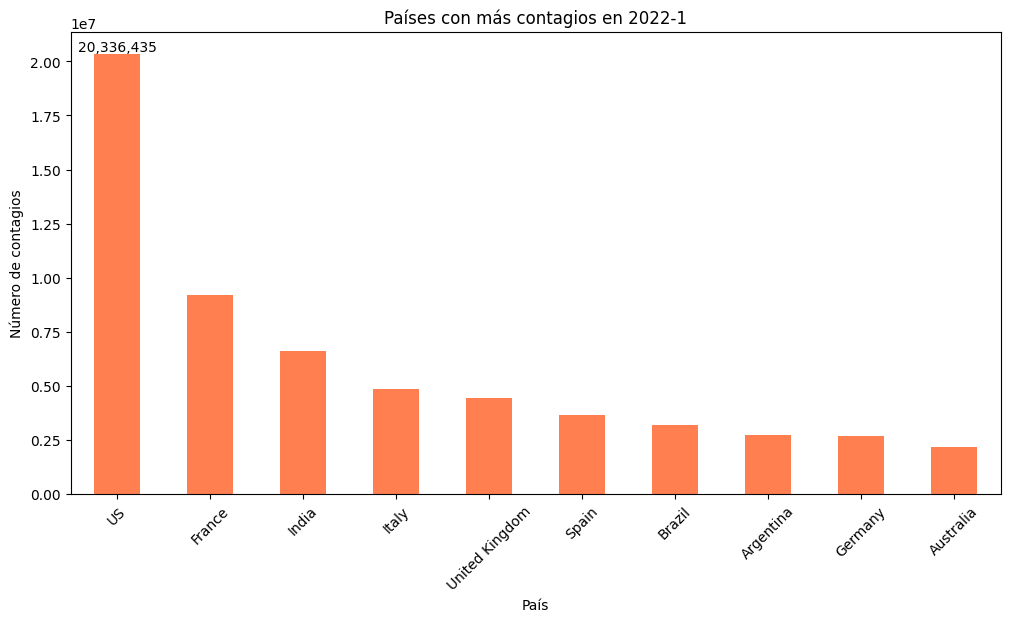

In [ ]:
# Gráfico de los países con más casos en el mes pico
plt.figure(figsize=(12, 6))
axMax = contagios_por_pais_mes_max.sort_values(ascending=False).head(10).plot(kind='bar', color='coral')
plt.title(f'Países con más contagios en {ano_max}-{mes_max}')
plt.xlabel('País')
plt.ylabel('Número de contagios')
plt.xticks(rotation=45)

# Añadir el valor solo en la barra del país con más contagios
pais_max_indice = contagios_por_pais_mes_max.sort_values(ascending=False).head(10).index.get_loc(pais_max_contagios)
valor_pais_max = contagios_por_pais_mes_max[pais_max_contagios]

# Mostrar el valor en la barra correspondiente
axMax.text(pais_max_indice, valor_pais_max + 1000, f'{valor_pais_max:,.0f}', ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
# 3. Encontrar el país con el menor número de casos reportados hasta la fecha
total_casos_por_pais = df_consolidado.groupby('Country/Region')['Casos confirmados'].max()

# Identificar el país con el menor número de casos reportados
pais_min_casos = total_casos_por_pais.idxmin()
print(f"El país con el menor número de casos reportados hasta la fecha es {pais_min_casos}, con {total_casos_por_pais[pais_min_casos]:,} casos.")


El país con el menor número de casos reportados hasta la fecha es Korea, North, con 1 casos.


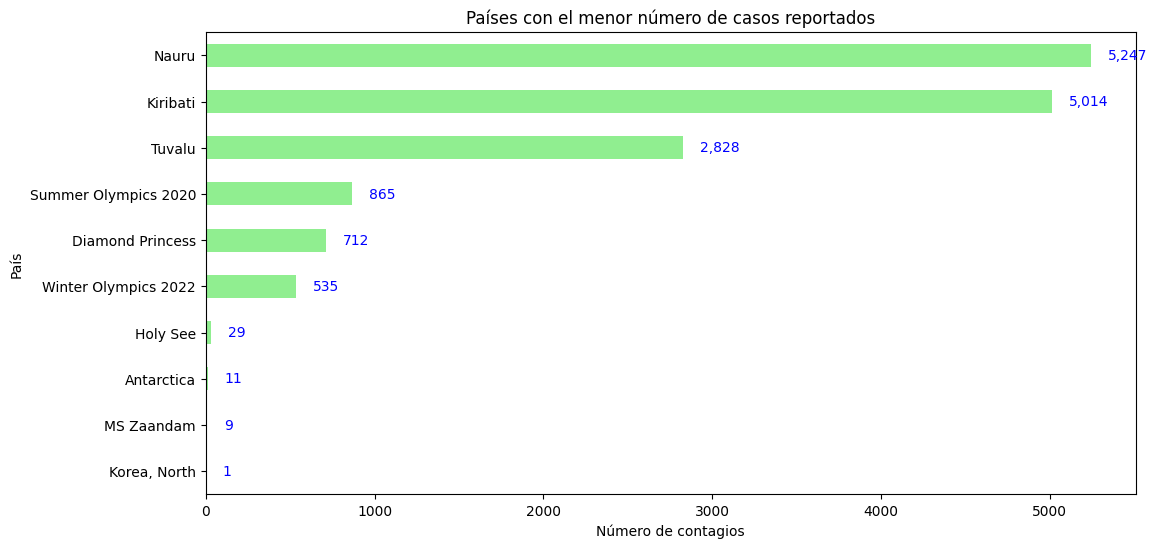

In [ ]:
# Gráfico de los países con menos casos acumulados
plt.figure(figsize=(12, 6))
ax = total_casos_por_pais.nsmallest(10).plot(kind='barh', color='lightgreen')
plt.title('Países con el menor número de casos reportados')
plt.xlabel('Número de contagios')
plt.ylabel('País')

# Añadir los valores en cada barra
for i in range(len(total_casos_por_pais.nsmallest(10))):
    valor = total_casos_por_pais.nsmallest(10).iloc[i]
    ax.text(valor + 100, i, f'{valor:,.0f}', va='center', fontsize=10, color='blue')

plt.show()

In [ ]:
# Agrupar los datos por país y calcular el máximo de casos confirmados
maximos_por_pais = df_melted.groupby('Country/Region')['Casos confirmados'].max()

# Convertir el resultado en un DataFrame
maximos_por_pais = maximos_por_pais.reset_index()
pais_a_filtrar = "China"
df_filtrado = maximos_por_pais[maximos_por_pais['Country/Region'] == pais_a_filtrar]
df_filtrado.head(2000)

,Country/Region,Casos confirmados
37,China,2876106


In [ ]:
# Ordenar el DataFrame por país y fecha para asegurar un cálculo correcto
df = df_melted.sort_values(by=['Country/Region', 'Fecha'])

# Calcular los casos diarios
df['CasosDiarios'] = df.groupby('Country/Region')['Casos confirmados'].diff()

# Rellenar los primeros valores de cada grupo (donde no hay valor anterior) con el valor acumulado
df['CasosDiarios'] = df['CasosDiarios'].fillna(df['Casos confirmados'])

df.head()

,Province/State,Country/Region,Lat,Long,Fecha,Casos confirmados,CasosDiarios,Mes
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0.0,2020-01
289,NaN,Afghanistan,33.93911,67.709953,2020-01-23,0,0.0,2020-01
578,NaN,Afghanistan,33.93911,67.709953,2020-01-24,0,0.0,2020-01
867,NaN,Afghanistan,33.93911,67.709953,2020-01-25,0,0.0,2020-01
1156,NaN,Afghanistan,33.93911,67.709953,2020-01-26,0,0.0,2020-01


In [ ]:
# Agrupar por país y calcular la suma total de casos
total_casos_por_pais = df.groupby('Country/Region')['CasosDiarios'].sum()

# Renombrar la columna de la suma
total_casos_por_pais.columns = ['País', 'TotalCasos']

total_casos_por_pais.head(20)


,CasosDiarios
Country/Region,
Afghanistan,209451.0
Albania,334457.0
Algeria,271496.0
Andorra,47890.0
Angola,105288.0
Antarctica,11.0
Antigua and Barbuda,9106.0
Argentina,10044957.0
Armenia,447308.0


### Conclusión
La limpieza y preparación de datos es una tarea esencial en cualquier proyecto de análisis de datos. Python, junto con sus librerías, proporciona un entorno poderoso y flexible para realizar estas tareas. Al aplicar estos pasos y utilizar las herramientas adecuadas, se pueden obtener datos de alta calidad y realizar análisis más precisos y confiables.